# Julia execution

https://colab.research.google.com/drive/1ku4EtbnkgmQTjw68w8fUAG1XqL0ow5tI#scrollTo=jvuYw7Yrhc1L

In [ ]:
from julia.api import Julia
jl = Julia(compiled_modules=False)

from julia import Main
jl.eval('include("run_quantum_annealing.jl")')
jl.eval("run_quantum_annealing.jl")

We modified the Julia file so that the result output as a csv

# retrieve samples

In [3]:
import csv
from matplotlib import pyplot as plt
import numpy as np

In [4]:
csvfile = open('samples.csv', newline='') 
csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
first=True;
bits = [];
for row in csvreader:
    if first==True:
        first=False
    else:
        bits.append(format(int(row[0]), '06b'))

In [5]:
bits_np = np.array(bits)

In [6]:
values, counts = np.unique(bits_np, return_counts=True)

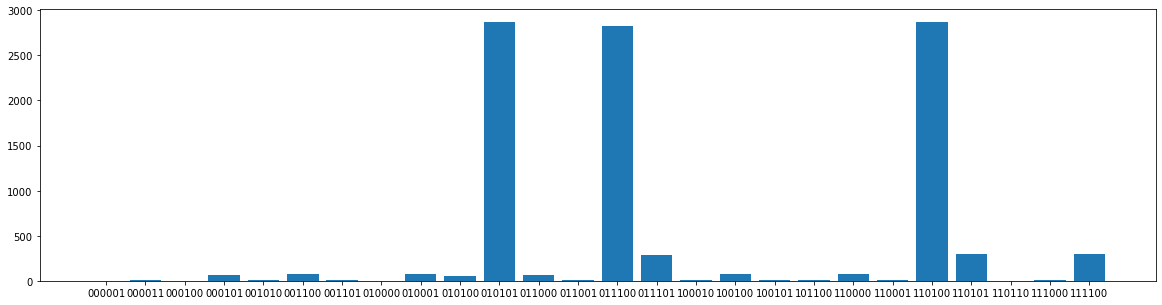

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
ind = np.arange(len(values))
ax.bar(ind,counts)
ax.set_xticks(ind)
ax.set_xticklabels(values);

three main configurations are optimal

# Graph class

In [29]:
graph = [(0.3461717838632017, 1.4984640297338632), 
         (0.6316400411846113, 2.5754677320579895), 
         (1.3906262250927481, 2.164978861396621), 
         (0.66436005100802, 0.6717919819739032), 
         (0.8663329771713457, 3.3876341010035995), 
         (1.1643107343501296, 1.0823066243402013)
        ]

# plot results

In [31]:
class GraphClass():
    def __init__(self, graph):
        self.graph = graph
        self.num_vertices = len(self.graph)
        self.occupations = np.random.rand(self.num_vertices) < 0.5
        self.edges = self.find_edges()
    
    def find_edges(self):
        #num_pairs = int(self.num_vertices*(self.num_vertices)*0.5)
        edges = np.zeros((self.num_vertices, self.num_vertices), dtype=bool)
        
        for i in range(self.num_vertices-1):
            x_i, y_i = graph[i] # these are the x, y coordinates of the i'th vertex in the graph
            for j in range(i+1, self.num_vertices):
                x_j, y_j = graph[j] # these are the x, y coordinates of the j'th vertex in the graph
                
                # calculate the distance between vertices
                dij = np.sqrt((x_i - x_j)**2. + (y_i - y_j)**2.)
                if dij <= 1.0:
                    edges[i,j] = True
                    edges[j,i] = True
                    
                    print(f"{x_i:.2f}  {y_i:.2f}  {x_j:.2f}  {y_j:.2f}")
                
                    
        return edges     
    
    def draw_graph(self):
        graph_np = np.array(self.graph)
        xs = graph_np[:,0]
        ys = graph_np[:,1]
        cs = self.occupations

        fig, ax = plt.subplots()
        
        # plot the non activated vertices in the background
        for x,y,c in zip(xs,ys,cs):
            if not(c):
                circle = plt.Circle((x,y),0.5,color = 'gray' ,alpha=0.5)
                ax.add_patch(circle)
                
        for x,y,c in zip(xs,ys,cs):
            if c:
                circle = plt.Circle((x,y),0.5,color = 'b',alpha=0.3)
                ax.add_patch(circle)
        
        ax.axis('equal')
        
        return fig,ax

In [32]:
graph_c = GraphClass(graph)

0.35  1.50  0.66  0.67
0.35  1.50  1.16  1.08
0.63  2.58  1.39  2.16
0.63  2.58  0.87  3.39
0.66  0.67  1.16  1.08


(-0.55, 0.55, -0.55, 0.55)

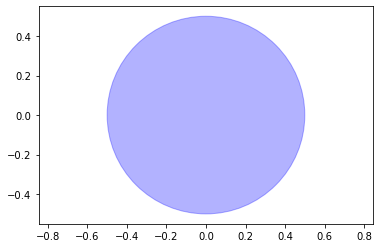

In [34]:
fig, ax = plt.subplots()
circle = plt.Circle((0,0),0.5,color = 'b',alpha=0.3)
ax.add_patch(circle)
ax.axis('equal')

In [35]:
vs = values[counts>2000]

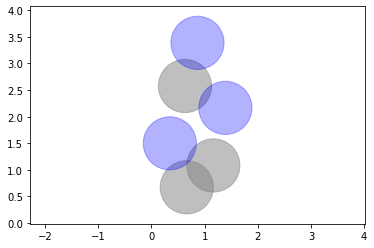

In [36]:
occupations = [True if x=='0' else False for x in vs[0]]
graph_c.occupations=occupations
graph_c.draw_graph();

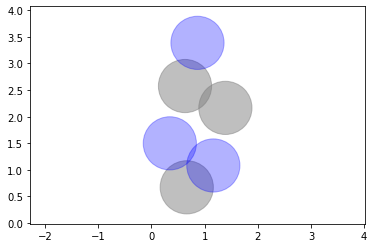

In [37]:
occupations = [True if x=='0' else False for x in vs[1]]
graph_c.occupations=occupations
graph_c.draw_graph();

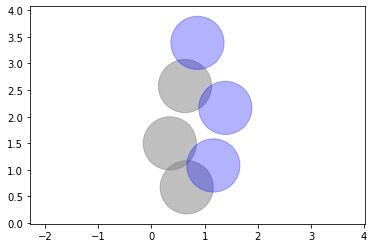

In [38]:
occupations = [True if x=='0' else False for x in vs[2]]
graph_c.occupations=occupations
graph_c.draw_graph();